### 1) Data Description: 
###### Code for full statistics is located at Q3

**Players:** in the player dataset, we have:
- Observations: 196
- Variables: 7
   - Experience
       - Type: Categorical (character)
       - Meaning: Level of skill of the player (Pro, Amateur, Veteran, Regular, Beginner)
    - Subscribe
       - Type: Logical (TRUE or FALSE)
       - Meaning: If they are a subscriber or not to a newsletter (HELP
    - hashedEmail
       - Type: Categorical (character)
       - Meaning: Emails of players in a hashed (anonymized) format for privacy 
    - played_hours
       - Type: Double (numeric)
       - Meaning: Number of hours played by each individual on the Minecraft server 
    - name
       - Type: Categorical (character)
       - Meaning: First names of each player
    - gender
       - Type: Categorical (character)
       - Meaning: The gender of each player 
    - Age
       - Type: Double (numeric)
       - Meaning: The age of each player
           

- Summary statistics:
    - Played hours
      - Mean:5.85
    - Age
      - Mean: 19
     

 
**Sessions:** in the player dataset, we have:
- Observations: 1535
- Variables: 5
   - hashedEmail
       - Type: Categorical (character)
       - Meaning: Emails of players in a hashed (anonymized) format for privacy 
    - start_time
       - Type: categorical (character)
       - Meaning: Date and time of started session (military time) HELo
    - end_time
       - Type: Categorical (character)
       - Meaning: Date and time of end session (military time)  HELP
    - original_start_time
       - Type: Double (numeric)
       - Meaning: Time of start session in UNIX time (milliseconds) 
    - original_end_time
       - Type: Double (numeric)
       - Meaning: Time of end session in UNIX time (milliseconds)

- Summary statistics:
    - Original start time 
      - Mean:1.72e+12
    - Original end time
      - Mean: 1.72e+12
     
**Issues:** 
- Sessions ⇒ start and end time have two values in each cell
- Many emails are from the same person, meaning many  data points (and not tiddy)
- People fill out their own info, meaning they could lie
- Hashed emails could be done wrong 


### 2) Questions:

**Broader question:** 
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific question:**
Could experience, game-play time, and age predict whether or not an individual will subscribe to the Minecraft research newsletter in the player dataset?


The data from the player set will help me address the question, as it contains the key predictor variables, experience level, total hours played and age. With these variables, we are able to predict whether or not someone is likely to subscribe to a video game-related newsletter. Some wrangling is needed in order to complete this task. Primarily focusing on the Player data set, I would need to ensure that the data is properly encoded and handle any missing values so I can hopefully predict the probability of someone subscribing to a game-related newsletter. Moreover, I will need to convert experience into numerical data, which can be done since there is an order to the experience variables. Meaning that we can associate amateur = 1, beginner = 2, pro = 3, regular = 4, veteran = 5, since each variable has an increasing level of experience. 





### 3) Exploratory Data Analysis and Visualization:


In [17]:
# run cell before start 
library(tidyverse)
library(repr)
library(tidymodels)

In [18]:
#Upload datasets to R:
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

head(sessions)


#wrangle players
players <- players |>
    mutate(
        subscribe = as.factor(subscribe),
        experience = as.factor(experience))
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [19]:
# Summary of Players file 
#general stats 
summary_players <- summary(players)
summary_players

# quantitative variables (in tibble)
players |>
summarise( 
    #played hours
    mean_ = mean(played_hours, na.rm = TRUE), 
    median_played_hours = median(played_hours, na.rm = TRUE), 
    sd_played_hours = sd(played_hours, na.rm = TRUE), 
    min_played_hours = min(played_hours, na.rm = TRUE), 
    max_played_hours = max(played_hours, na.rm = TRUE),
    #age
    mean_age = mean(Age, na.rm = TRUE), 
    median_age = median(Age, na.rm = TRUE),
    sd_age = sd(Age, na.rm = TRUE),
    min_age = min(Age, na.rm = TRUE),
    max_age = max(Age, na.rm = TRUE))

#categorical variables (in tibble)
#experience
players |>
  count(experience)
#gender
players |>
  count(gender)
#subscribe
players|>
  count(subscribe)

    experience subscribe   hashedEmail         played_hours    
 Amateur :63   FALSE: 52   Length:196         Min.   :  0.000  
 Beginner:35   TRUE :144   Class :character   1st Qu.:  0.000  
 Pro     :14               Mode  :character   Median :  0.100  
 Regular :36                                  Mean   :  5.846  
 Veteran :48                                  3rd Qu.:  0.600  
                                              Max.   :223.100  
                                                               
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                                       NA's   :2      

mean_,median_played_hours,sd_played_hours,min_played_hours,max_played_hours,mean_age,median_age,sd_age,min_age,max_age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.845918,0.1,28.35734,0,223.1,21.13918,19,7.389687,9,58


experience,n
<fct>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


gender,n
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


subscribe,n
<fct>,<int>
FALSE,52
TRUE,144


In [20]:
# Summary of sessions file 
summary_sessions <- summary(sessions)
summary_sessions

# Statistics for quantitative variables 
sessions |>
summarise( 
    #og_start_time 
    mean_og_start = mean(original_start_time, na.rm = TRUE), 
    median_og_start = median(original_start_time, na.rm = TRUE), 
    sd_og_start = sd(original_start_time, na.rm = TRUE),
    min_og_start  = min(original_start_time, na.rm = TRUE), 
    max_og_start  = max(original_start_time, na.rm = TRUE),
    #age
    mean_original_end = mean(original_end_time, na.rm = TRUE), 
    median_original_end = median(original_end_time, na.rm = TRUE),
    sd_original_end = sd(original_end_time, na.rm = TRUE),
    min_original_end = min(original_end_time, na.rm = TRUE),
    max_original_end = max(original_end_time, na.rm = TRUE))

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

mean_og_start,median_og_start,sd_og_start,min_og_start,max_og_start,mean_original_end,median_original_end,sd_original_end,min_original_end,max_original_end
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.719201e+12,1.7192e+12,3557491589,1.7124e+12,1.72733e+12,1.719196e+12,1.71918e+12,3552813134,1.7124e+12,1.72734e+12


#### Exploratory visualization 

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


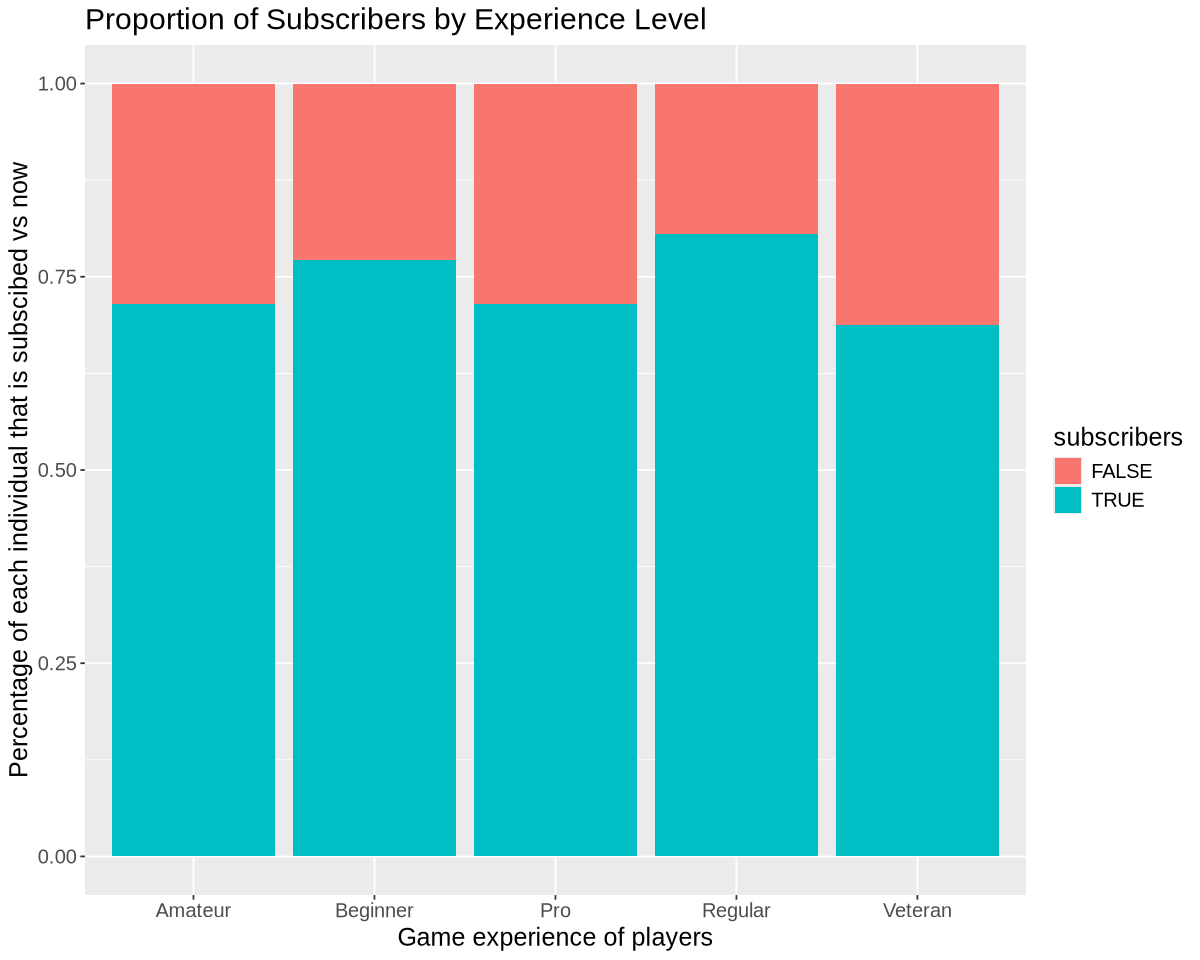

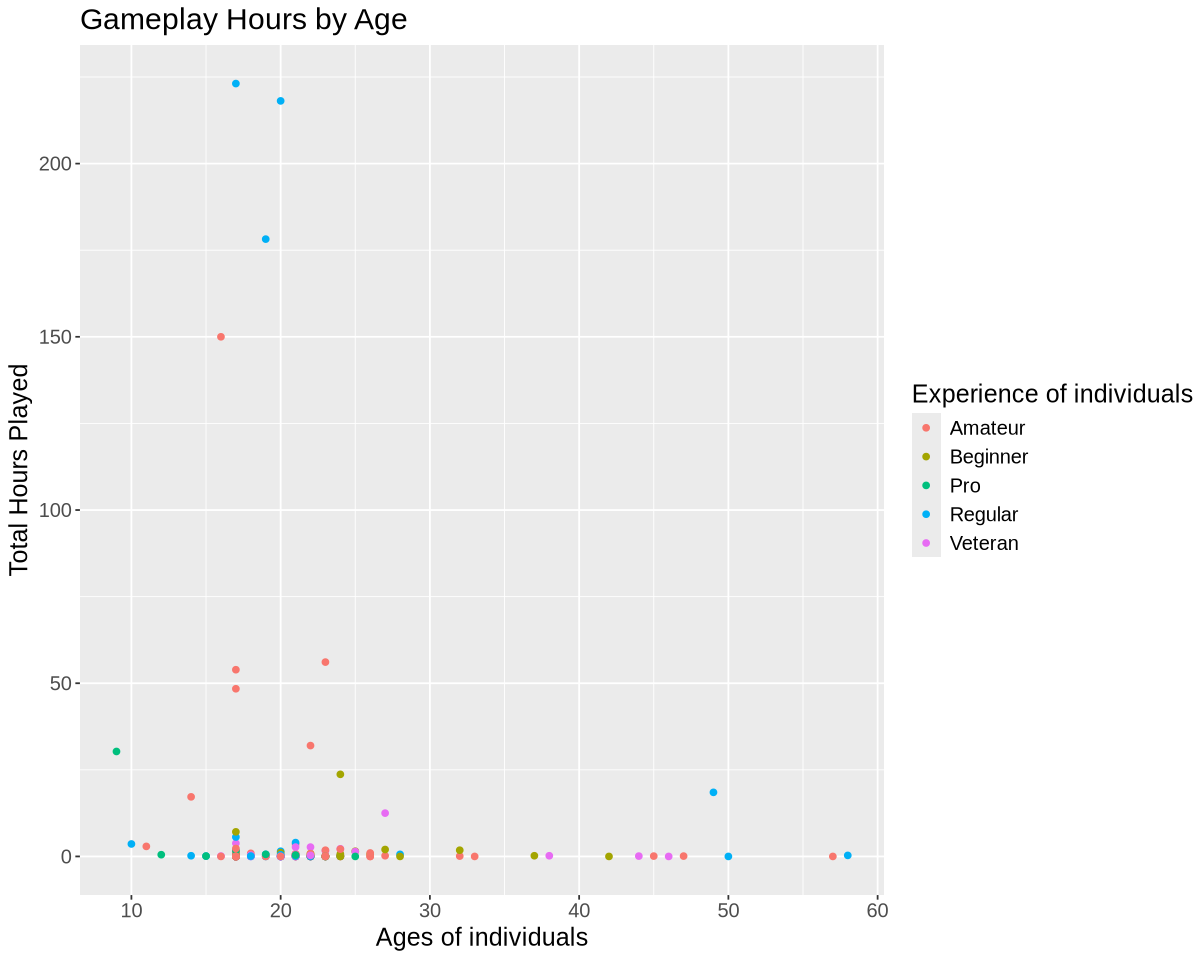

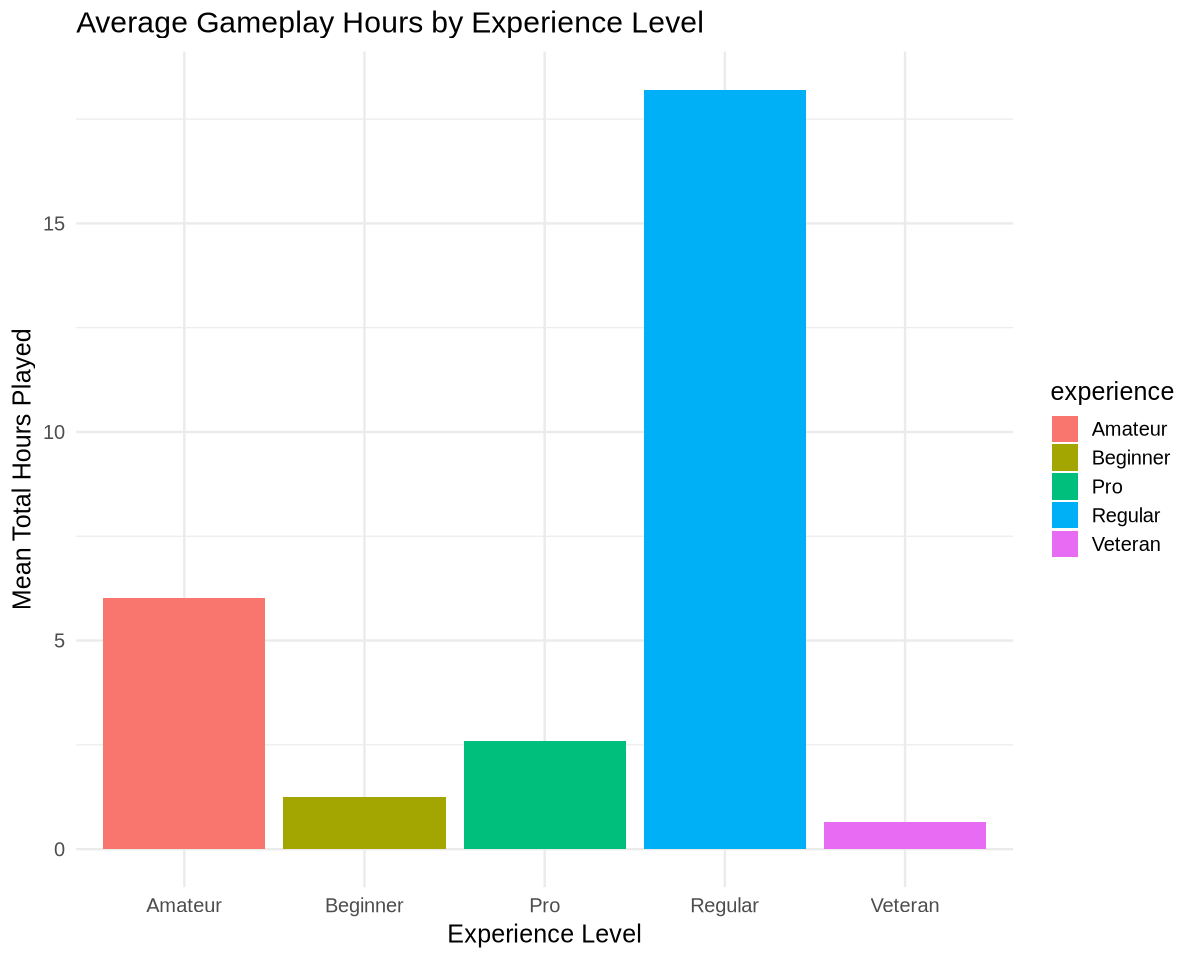

In [21]:
#do some exploratory visualization 
options(repr.plot.height = 8, repr.plot.width = 10)

exerpience_prop <- players |>
    ggplot(aes(x=experience, fill = subscribe)) +
  geom_bar(position = "fill") +
    labs( x = "Game experience of players", 
        y = "Percentage of each individual that is subscibed vs now",
        fill = "subscribers",
         title = "Proportion of Subscribers by Experience Level")+
    theme(text = element_text(size = 15))

exerpience_prop

experience_vs_hours <- players|>
ggplot(aes(x = Age, y = played_hours, colour = experience)) +
  geom_point() +
  labs(
    title = "Gameplay Hours by Age",
    x = "Ages of individuals",
    y = "Total Hours Played",
    colour = "Experience of individuals"
  ) +
 theme(text = element_text(size = 15))
experience_vs_hours 


players |>
  group_by(experience) |>
  summarise(mean_hours = mean(played_hours, na.rm = TRUE)) |>
  ggplot(aes(x = experience, y = mean_hours, fill = experience)) +
    geom_bar(stat = 'identity') +
  labs(
    title = "Average Gameplay Hours by Experience Level",
    x = "Experience Level",
    y = "Mean Total Hours Played"
  ) +
  theme_minimal(base_size = 15)

#### Insight from graphs
- For all levels of experience, there are more than 1/2 that are subscribers
- There are more players aged 15 to 28 than any other range, and most play less than 25 hours a week.
- There are a lot of regular players who play the most hours
- Age does not seem to have any relationship with how many hours one plays or their experience 



### 4) Methods and Plan:
Before performing any modelling on my data, I would first need to make sure that my variables of interest are of the proper type. As previously stated, I  have already converted subscribe and experience into factors; however, experience will need to be encoded numerically for modelling. Once all the data is properly formatted, I would use a k-nearest neighbours (K-NN) classification model to address my question, since  it captures non-linear patterns between predictors and the response variable, unlike linear models. K-NN classification is an appropriate model since it is a non-parametric method, meaning it does not assume a specific shape or form between the variables. That being said, some limitations need to be considered if we are to choose K-NN, firstly, that the predictors must be on the same scale and standardized, since the model  relies on the distance calculations. Additionally, the model can also be influenced by irrelevant noise, meaning the data used must be specific to the question and must be cleaned up beforehand. The latter is one reason why I chose to only focus on the Players dataframe.  Furthermore, to ensure the model is properly validated and to prevent  overfitting, the training set and instead make accurate predictions, I will split the data into training (75%) and testing sets (25%). To evaluate the model performance, I will use 5-fold cross-validation within the training set to tune the number of neighbours (k). In order to select the best model, I will examine the cross-validated accuracies, providing me with the best K value, and after comparing both, the model will be ready to evaluate on the test set. 
